# HUMANS AND NON-HUMANS CLASSIFICATION

# Verzeo Major Project February 
# BATCH: B_19

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras import optimizers

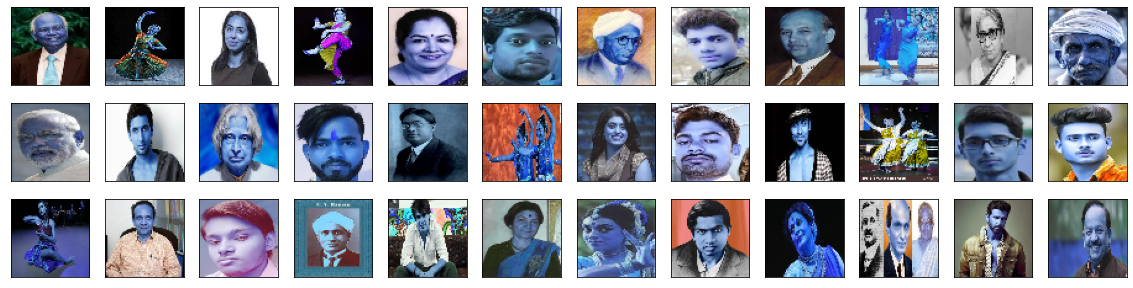

In [66]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(64,64))
            images.append(img1)
    return images
#Load the images 
humans=load_images_from_folder('D:/Users/arnap/Desktop/humans')
non_humans=load_images_from_folder('D:/Users/arnap/Desktop/non_humans')


train_humans = np.array(humans)
train_non_humans = np.array(non_humans)



#Visualize the images 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(humans[i]))

In [67]:
train_humans_label=np.zeros(len(train_humans))
train_non_humans_label=np.ones(len(train_non_humans))


print(train_humans.shape,train_humans_label.shape)
print(train_non_humans.shape,train_non_humans_label.shape)

(744, 64, 64, 3) (744,)
(214, 64, 64, 3) (214,)


In [68]:
#Concatenate 
X=np.concatenate((train_humans,train_non_humans))
y=np.concatenate((train_humans_label,train_non_humans_label))
y_label =to_categorical(y)
#Train -Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=0,shuffle=True)
#Normalize the data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (766, 64, 64, 3)
Testing Data (192, 64, 64, 3)


In [64]:
#HyperParameters
batch_size = 64
epochs = 20
num_classes = 2
input_shape=(64,64,3)
#Model Define
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)     

In [69]:
np.random.seed(42)
model_1=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64,shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 766 samples, validate on 192 samples
Epoch 1/20
766/766 [==============================] - 5s 6ms/step - loss: 0.7244 - accuracy: 0.7507 - val_loss: 0.6168 - val_accuracy: 0.7552
Epoch 2/20
766/766 [==============================] - 4s 6ms/step - loss: 0.5244 - accuracy: 0.7820 - val_loss: 0.5171 - val_accuracy: 0.7552
Epoch 3/20
766/766 [==============================] - 4s 6ms/step - loss: 0.4415 - accuracy: 0.8172 - val_loss: 0.4262 - val_accuracy: 0.8542
Epoch 4/20
766/766 [==============================] - 4s 6ms/step - loss: 0.2998 - accuracy: 0.8903 - val_loss: 0.3498 - val_accuracy: 0.8646
Epoch 5/20
766/766 [==============================] - 4s 5ms/step - loss: 0.2381 - accuracy: 0.9125 - val_loss: 0.4250 - val_accuracy: 0.8542
Epoch 6/20
766/766 [==============================] - 4s 6ms/step - loss: 0.2733 - accuracy: 0.8864 - val_loss: 0.3758 - val_accuracy: 0.8177
Epoch 7/20
766/766 [==============================] - 4s 6ms/step - loss: 0.2279 - accuracy: 0.9060 - 

Test loss: 0.44830525914827984
Test accuracy: 0.875


Text(0.5, 1.0, 'Training and validation loss')

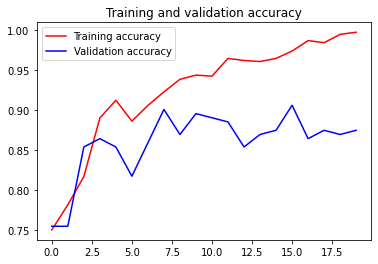

In [70]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [71]:
from sklearn.metrics import confusion_matrix
y_test_pred=model.predict(X_test)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
cnf_matrix

array([[135,  10],
       [ 14,  33]], dtype=int64)

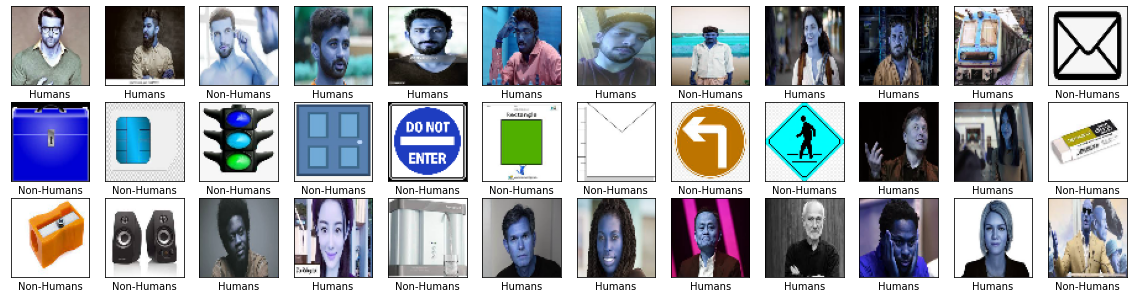

In [73]:
testdata= load_images_from_folder('D:/Users/arnap/Desktop/test')
testimages=np.array(testdata)
predicted_classes = model.predict(testimages)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
#Visualize the test data
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1,xticks=[], yticks=[])
    plt.imshow(testimages[i])
    if (predicted_classes1[i]==0):
        plt.xlabel('Humans')
    if (predicted_classes1[i]==1):
        plt.xlabel('Non-Humans')
      
plt.show()

# THANK YOU :))
